In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [2]:
train_data = pd.read_csv("emnist-balanced-train.csv", header = None)
test_data = pd.read_csv("emnist-balanced-test.csv", header = None)
mapping = pd.read_csv("emnist-balanced-mapping.txt", sep = ' ', header = None)

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

#### Preprocessing

In [5]:
train_data.shape

(112800, 785)

In [6]:
test_data.shape

(18800, 785)

For the training phase, we have 112800 samples (images), each is represented by 784 feature (28x28 pixels)

In [7]:
# Rename label column
train_data.rename(columns= {0: 'label'}, inplace = True)
test_data.rename(columns= {0: 'label'}, inplace = True)
train_data.columns

Index(['label',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783,     784],
      dtype='object', length=785)

In [8]:
mapping.head()

,0,1
0,0,48
1,1,49
2,2,50
3,3,51
4,4,52


In [9]:
train_data['label'].unique()

array([45, 36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3,
       40, 14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31,
       16,  7,  2,  8, 10,  6, 27, 33, 11, 18, 41,  0, 21], dtype=int64)

In [10]:
# Create mapping dictionary
map_dict = {}
asc_code = mapping[1].values
for i, v in enumerate(asc_code):
    map_dict[i] = chr(v)
    
map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In this notebook the focus is on predicting the uppercase letters and digits only, so I will filter out all lowercase letters in the datasets

In [11]:
acceptable_range = np.arange(0, 36)
train_data = train_data[train_data["label"].isin(acceptable_range)]
test_data = test_data[test_data["label"].isin(acceptable_range)]
np.sort(train_data.label.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [12]:
# Resetting data index
train_data.reset_index(inplace = True)
train_data

,index,label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,112798,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_data.reset_index(inplace = True)

In [14]:
train_data = train_data.drop(['index'], axis = 1)
test_data = test_data.drop(['index'], axis = 1)

In [15]:
# Separate X and Y
X = train_data.drop(['label'], axis = 1).values
Y = train_data['label'].values
x_test = test_data.drop(['label'], axis = 1).values
y_test = test_data['label'].values
X = X/255.
x_test = x_test/ 255.

In [16]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Random Forest Classifier

In [17]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [18]:
rf = RandomForestClassifier(random_state = 42, criterion = "log_loss")
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', random_state=42)

In [19]:
def evaluate(model):
    y_pred = model.predict(x_train)
    print("Training accuracy: " + str(accuracy_score(y_train, y_pred)))
    y_pred = model.predict(x_val)
    print("Validation accuracy: " + str(accuracy_score(y_val, y_pred)))
    y_pred = model.predict(x_test)
    print("Test accuracy: " + str(accuracy_score(y_test, y_pred)))


In [20]:
evaluate(rf)

Training accuracy: 1.0
Validation accuracy: 0.8427469135802469
Test accuracy: 0.8401388888888889


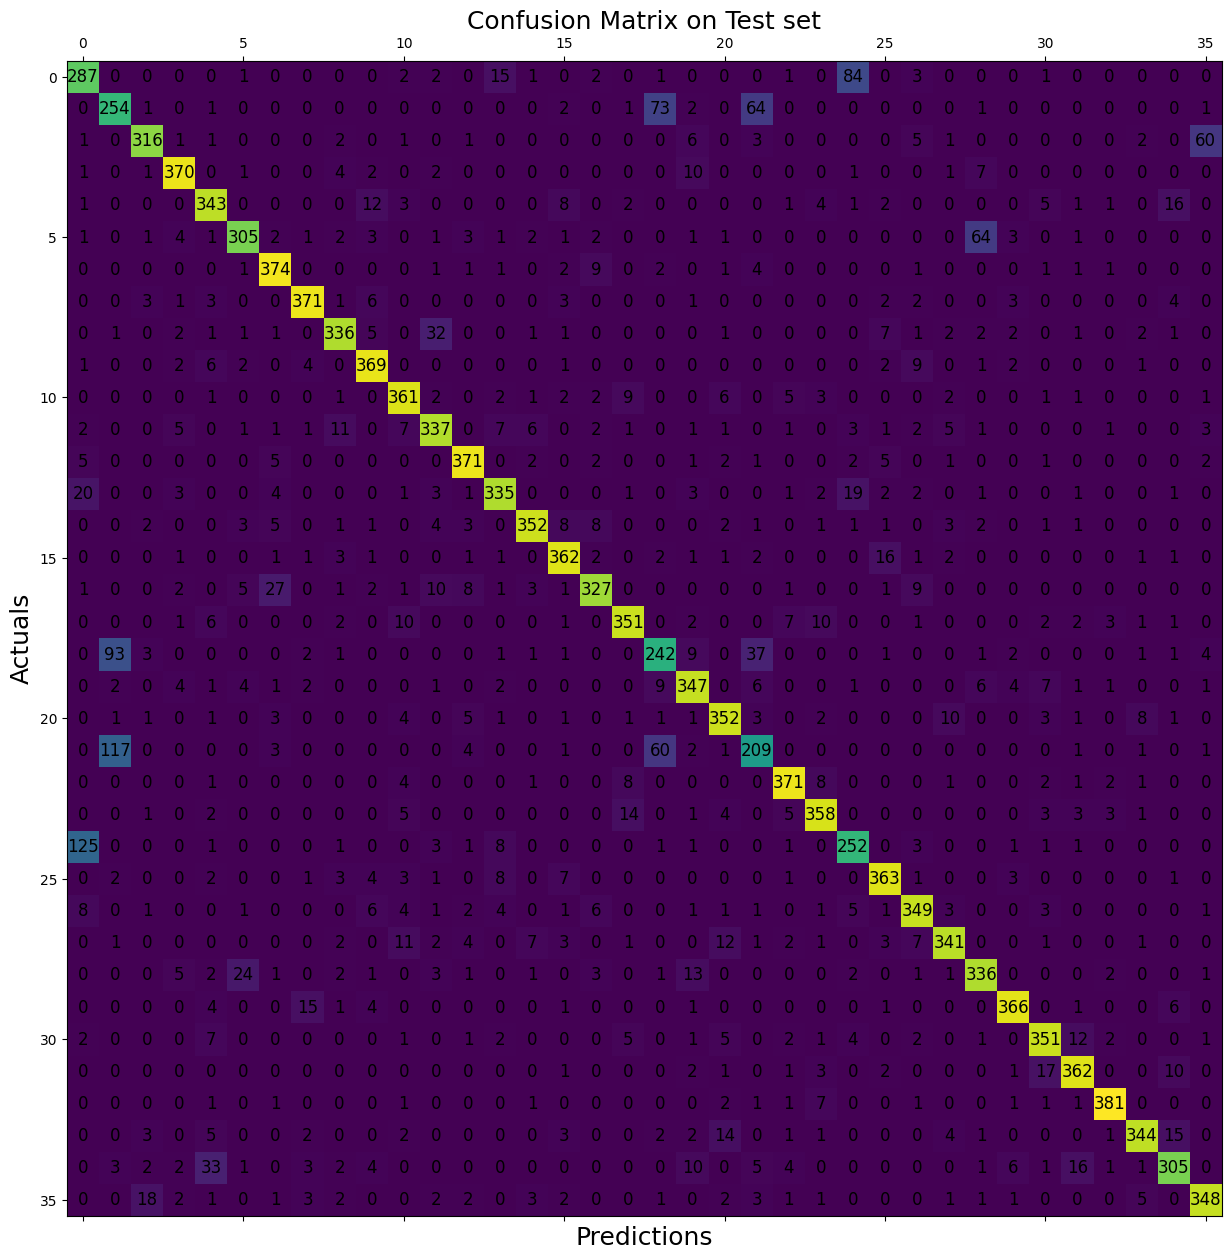

In [21]:
y_pred = rf.predict(x_test)
matrix = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(matrix)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix on Test set', fontsize=18)
plt.show()